In [1]:
# Imports - exercise 4
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
import time
import cv2
from scipy.ndimage import correlate
from skimage.filters import median
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.filters import gaussian
from skimage import data
from skimage import filters
from skimage.color import rgb2gray


In [2]:
# Exercise 1
input_img = np.arange(25).reshape(5, 5)
print(input_img)

weights = [[0, 1, 0],
           [1, 2, 1],
           [0, 1, 0]]
res_img = correlate(input_img, weights)

print(input_img[3,3])
print(res_img[3,3])



[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
18
108


In [3]:
# Exercise 2
res_img2 = correlate(input_img, weights, mode="constant", cval=10)
print(input_img)
print(res_img)
print(res_img2)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]
[[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]


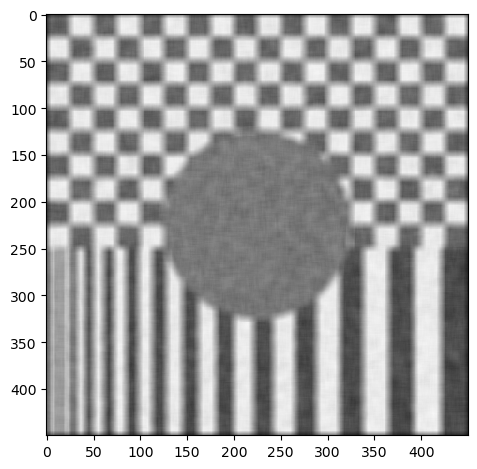

In [4]:
# Exercise 3
in_dir = "./data/"
im_name = "Gaussian.png"

# Read the image.
input_img = io.imread(in_dir + im_name)


size = 10
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)

res_img = correlate(input_img, weights, mode="constant")

io.imshow(res_img)
io.show()

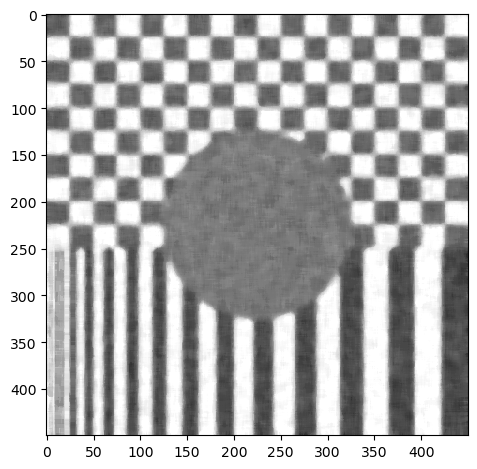

In [5]:
# Exercise 4
size = 10
footprint = np.ones([size, size])
med_img = median(input_img, footprint)

io.imshow(med_img)
io.show()

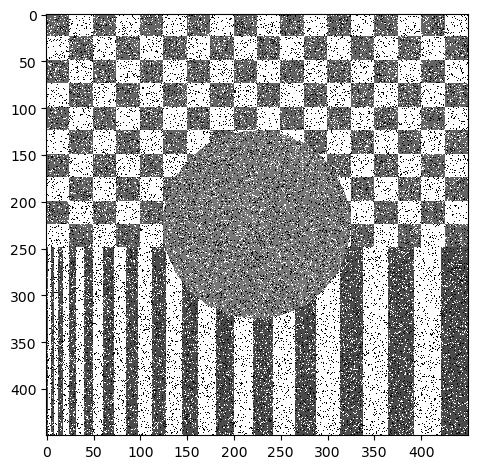

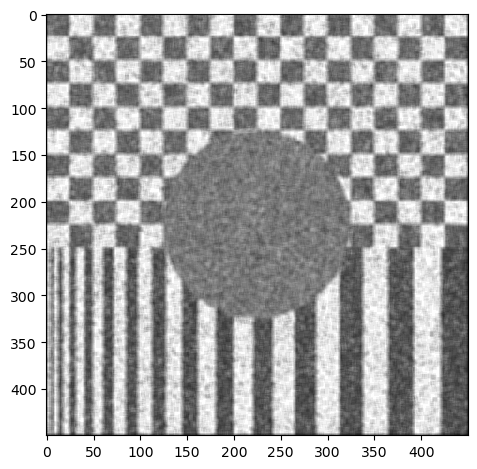

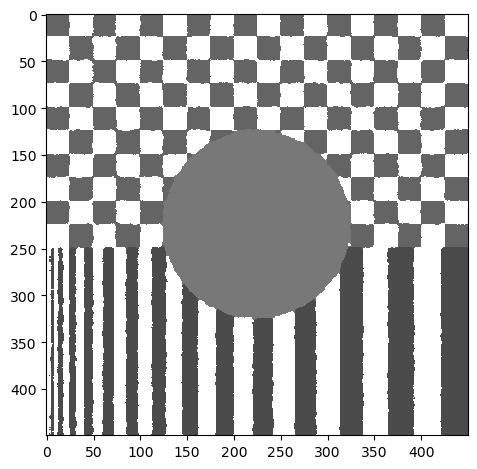

In [6]:
# Exercise 5
in_dir = "./data/"
im_name = "SaltPepper.png"

# Read the image.
input_img = io.imread(in_dir + im_name)

io.imshow(input_img)
io.show()

size = 5
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)

res_img = correlate(input_img, weights, mode="constant")

io.imshow(res_img)
io.show()

size = 5
footprint = np.ones([size, size])
med_img = median(input_img, footprint)

io.imshow(med_img)
io.show()


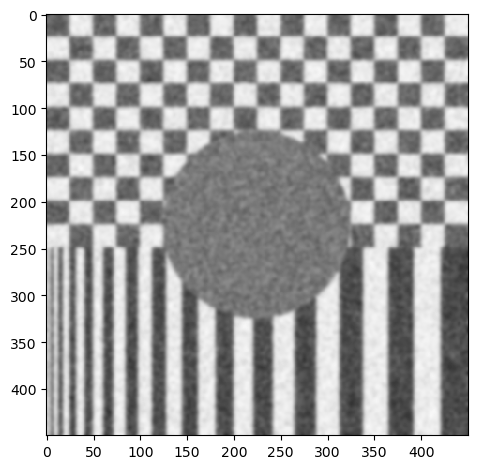

In [7]:
# Exercise 6
in_dir = "./data/"
im_name = "Gaussian.png"

# Read the image.
input_img = io.imread(in_dir + im_name)

sigma = 2
gauss_img = gaussian(input_img, sigma)

io.imshow(gauss_img)
io.show()

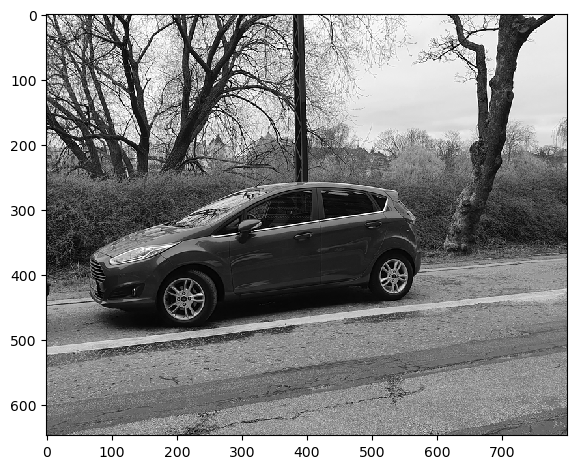

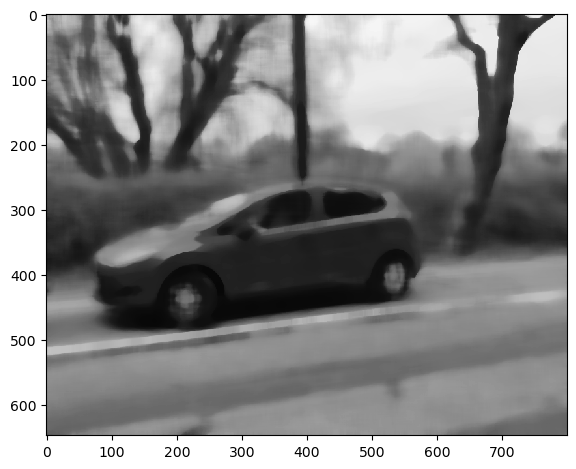

In [8]:
# Exercise 7
in_dir = "./data/"
im_name = "car.png"

# Read the image.
car_img = io.imread(in_dir + im_name, as_gray=True)

io.imshow(car_img)
io.show()

size = 20
footprint = np.ones([size, size])
med_img = median(car_img, footprint)

io.imshow(med_img)
io.show()

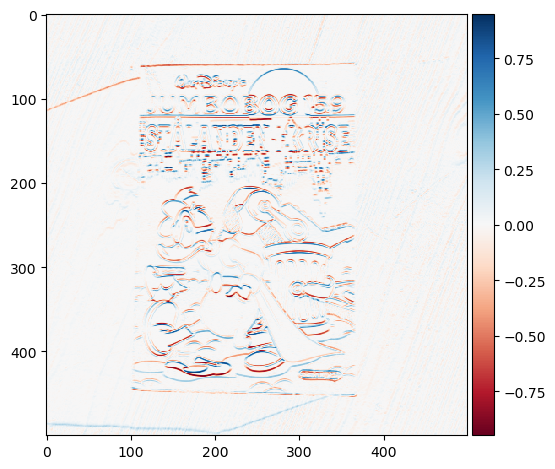

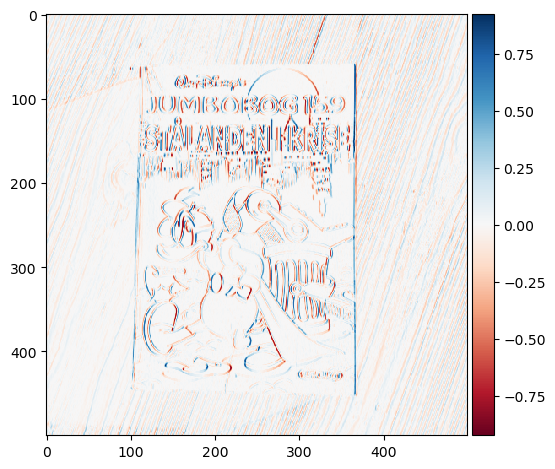

In [9]:
# Exercise 8

from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt

in_dir = "./data/"
im_name = "donald_1.png"

# Read the image.
donald_img = io.imread(in_dir + im_name, as_gray=True)

preth = prewitt_h(donald_img)
pretv = prewitt_v(donald_img)

io.imshow(preth)
io.show()

io.imshow(pretv)
io.show()

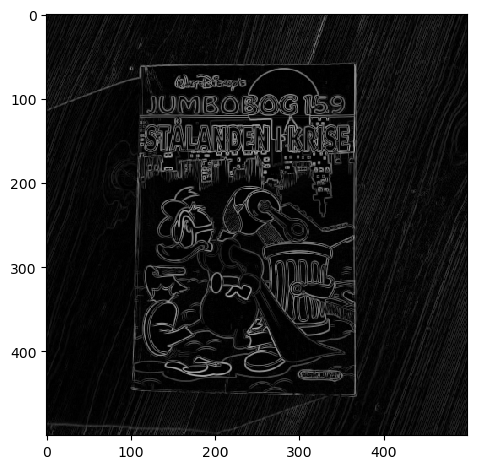

In [10]:
# Exercise 9

pret = prewitt(donald_img)

io.imshow(pret)
io.show()

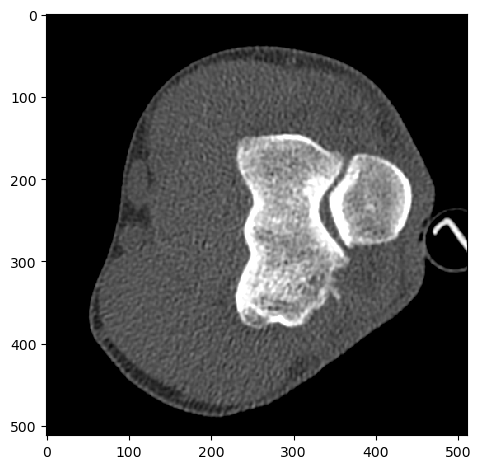

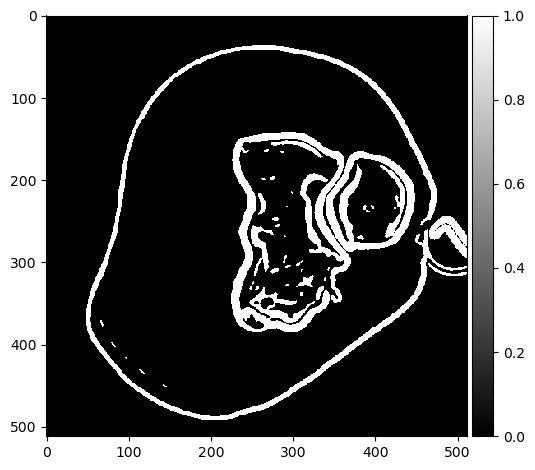

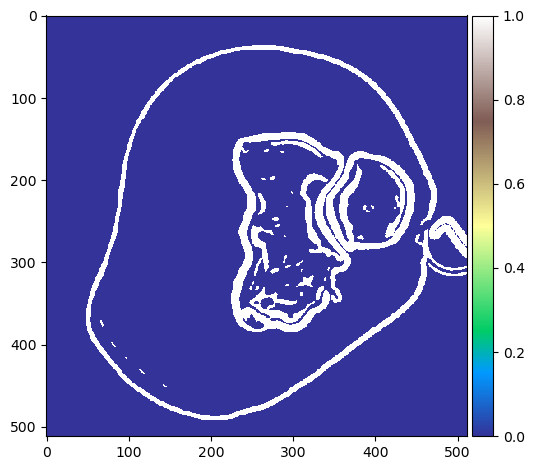

In [26]:
# Exercise 10

in_dir = "./data/"
im_name = "ElbowCTSlice.png"

# Read the image.
elbow_img = io.imread(in_dir + im_name, as_gray=True)

io.imshow(elbow_img)
io.show()

# Gaussian
sigma = 3
gauss_img = gaussian(elbow_img, sigma)
# gauss_img = median(elbow_img)

# Prewitt
pre = prewitt(gauss_img)

# Otsu
threshold = filters.threshold_otsu(pre)
bin_img = (pre > threshold)*1

io.imshow(img_as_ubyte(bin_img), cmap=plt.cm.gray)
io.show()

min_val = bin_img.min()
max_val = bin_img.max()
io.imshow(bin_img, vmin=min_val, vmax=max_val, cmap="terrain")